# Time-series Visualization 

## Objectives: 

* Explore the temporal structure of time series with line plots, lag plots, and autocorrelation plots.

* Understand and describe the distribution of observations using histograms and density plots.

* Measure the change in distribution over intervals using box and whisker plots and heat map plots.

## Introduction

Visualizations play an important role in timeseries analysis. Timeseries data naturally lends itself to visualization techniques for identifying of rises, falls, trends and noise etc. Plotting raw timeseries allows data diagnostics to identify temporal structures. 


In this lab, we will cover main techqniques for visualizing timeseries data in Python. We shall focus on univariate time series, but the techniques are just as applicable to multivariate time series, when you have more than one observation at each time step.

For this lab, we shall use a more interesting dataset `temp.csv` which carries the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia. The units are in degrees Celsius and there are 3,650 observations. The [SOURCE](https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990) of the data is credited as the Australian Bureau of Meteorology.


We shall use a [pandas `series` object](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.html) which is best suited for one dimensional data. 


In [1]:
import warnings
warnings.filterwarnings('ignore')

# Load required libraries
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
# Load the data from temp.csv as a new pandas 'Series' , print header and check the index
temp = Series.from_csv('temp.csv', header=0)
print(temp.head())
print(temp.index)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64
DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '1990-12-22', '1990-12-23', '1990-12-24', '1990-12-25',
               '1990-12-26', '1990-12-27', '1990-12-28', '1990-12-29',
               '1990-12-30', '1990-12-31'],
              dtype='datetime64[ns]', name='Date', length=3650, freq=None)


### Time-series Line Plots

Line plots are the most common technique for visualizing timeseries data as they can clearly show change over time. Using the convention, time is shown on the x-axis with observation values along the y-axis.

Let's use the simple `Series.plot()` function to draw the line graph from `temp` series. 

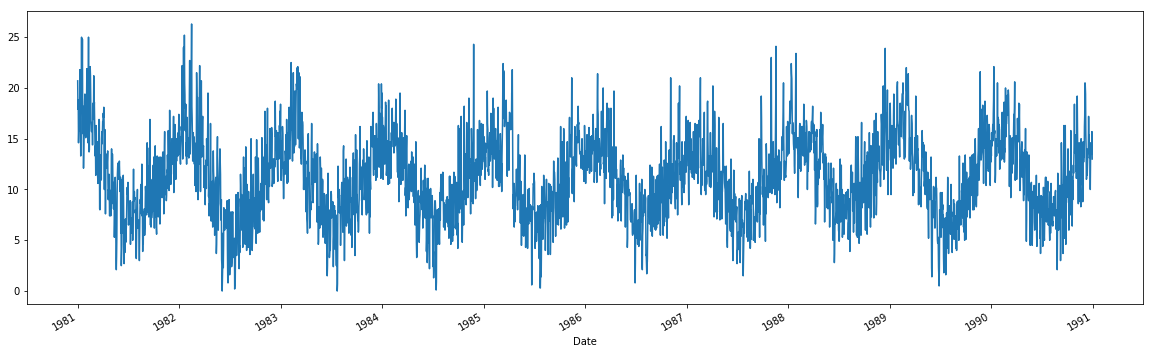

In [3]:
# Draw a line plot using temp and .plot() function. 
temp.plot(figsize = (20,6))
plt.show()

Some distinguishable patterns appear when we plot the data. Here we can see a pattern in our timeseries i.e. temperature values are maximum at the beginnig of each year and minimum at around month 6. Yes, we are talking about Australia here so this is normal. This is known as seasonality and will be covered in later labs. 

### Time-series dot plot
For a dense timeseries, as seen above, you may want to change the style of a line plot for a more refined visualization with a higher resolution of events. One way could be to change the continuous line to dots, each representing one entry in the time series. this can be achieved by `style` parameter of the line plot. lets pass `style='b.` as an argument to `.plot()` function

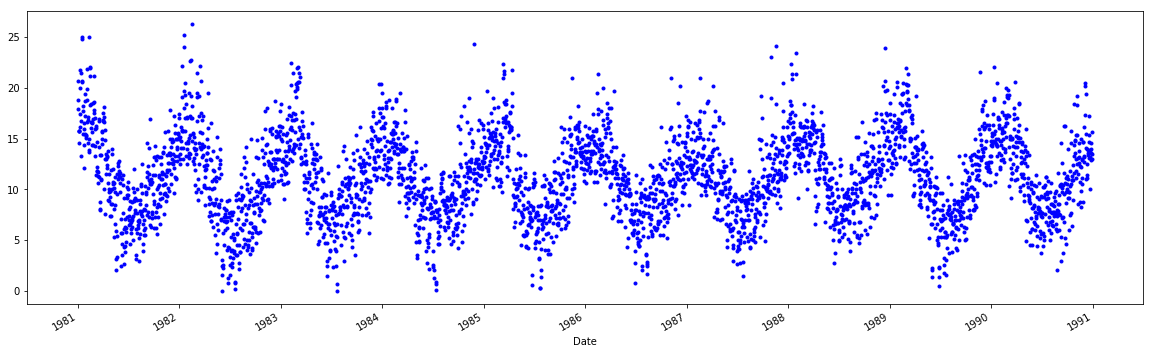

In [4]:
# Use dots instead on a continuous line and redraw the timeseries. 
temp.plot(figsize = (20,6), style = 'b.')
plt.show()

Here, we can see that the general pattern looks very much similar to the line plot, however, we are able to identify some outliers are extremely hot and extremely cold days. Dot plots can prove to be very helpful in identifying outliers and very small patterns which may not be so obvious otherwise. 

In the dataset, the minimum daily temperatures values spans 10 years. We can group data by year and create a line plot for each year for direct comparison.

### Grouping and Visualizing time-series Data

We shall now look at how a time-series can be re-grouped for a given a time interval i.e. weekly/yearly average values and compared to identify any changes taking places over time. 
We shall use `Pandas.grouper()` method to achieve this. Detailed documentation of this method can be accessed at [THIS](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Grouper.html) location. 

1. Import pandas grouper and use it to group values by year.

> **`series.groupby(pd.Grouper(freq = ‘A’))`**

Here, A refers to annual frequency. The list of aliases for time-series frequencies can be found [HERE](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

2. Enumerate the groups and observations for each year in a new DataFrame.

3. Plot the DataFrame and visualize each column as a subplot. 


In [8]:
# Use pandas grouper to group values using annual frequency
year_groups = temp.groupby(pd.Grouper(freq ='A'))

In [13]:
#Create a new DataFrame and store yearly values in columns 
temp_annual = pd.DataFrame()


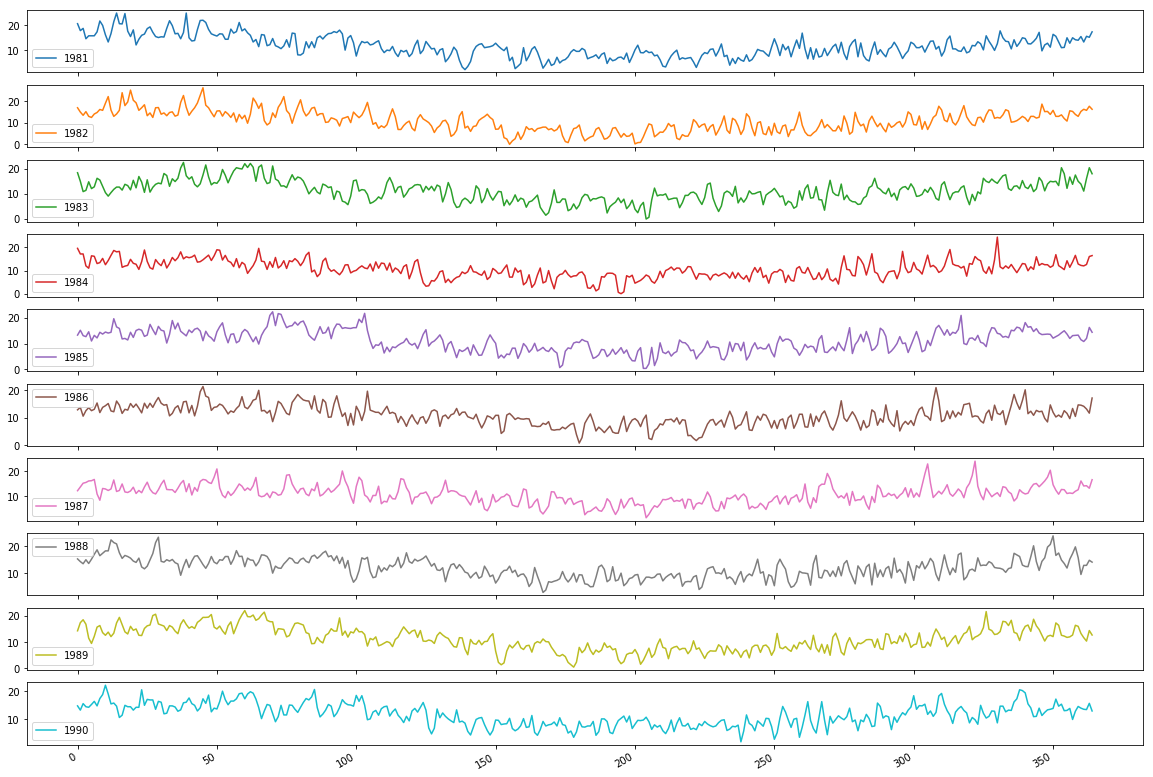

In [9]:
for yr, group in year_groups:
    temp_annual[yr.year] = group.values

# Plot the yearly groups as subplots
temp_annual.plot(figsize = (20,15), subplots=True, legend=True)
plt.show()

We can see 10 subplots corrospoding to number of columns in our new DataFrame. Each plot is 365 days in length following the annual frequency.

In some cases, in may also be a good a idea to plot these groups in an overlapping manner for a direct comparison. Disabling subplots can help us achieve this. 

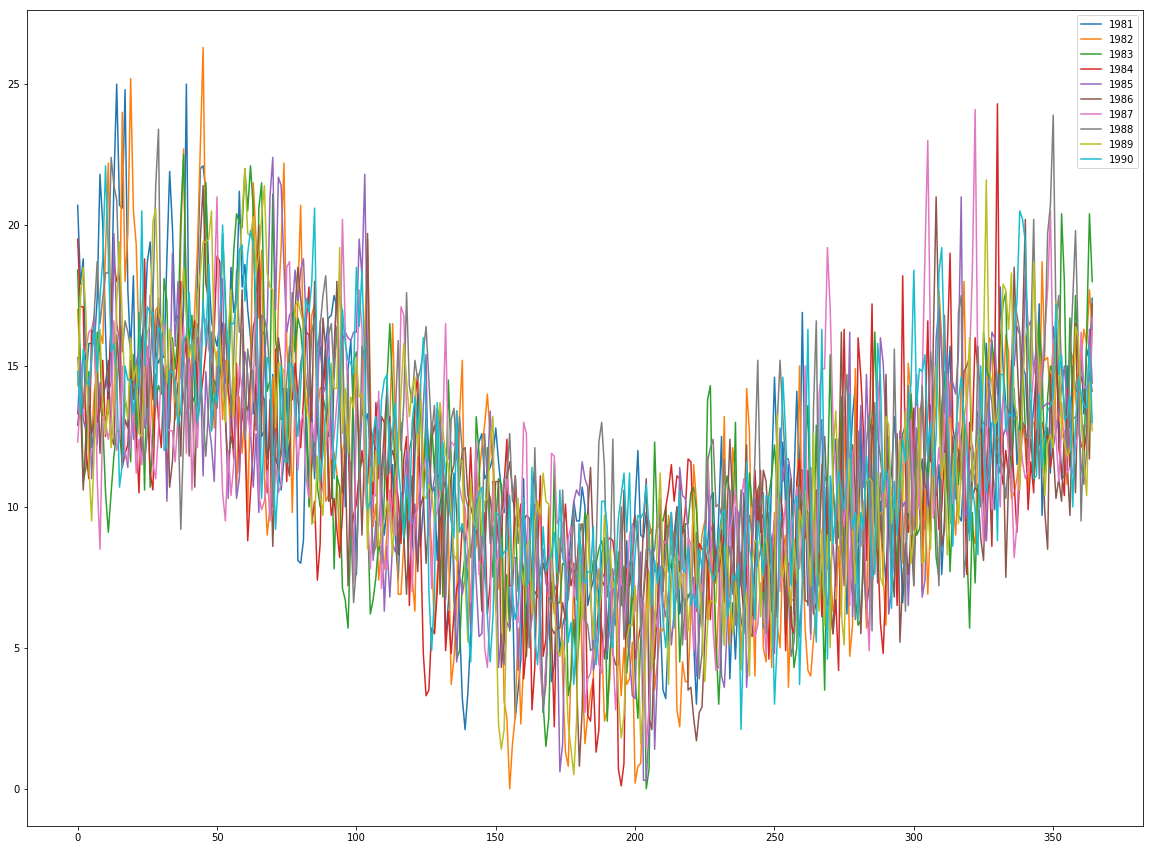

In [6]:
# Plot overlapping yearly groups 

temp_annual.plot(figsize = (20,15), subplots=False, legend=True)
plt.show()

We can see in both plots above that due the dense nature of time-series (365 values) and a high correlation between the values in different years (i.e. similar temperature values for each year), we can not clearly identify any differences in these groups. However, if you try this on the CO2 dataset used in the last lab, we should be able to see a clear trend showing an increase every year. 

### Time Series Histogram and Density Plots

Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering.

Most linear time series forecasting methods assume a well-behaved distribution of observations e.g. a normal distribution. This can be explicitly checked using tools like statistical hypothesis tests we saw during hypothesis testing exercises. Visualizing these distributions can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

We will now create a histogram plot of the observations in the dataset using `hist()`. 

>A histogram groups values into bins, and the frequency or count of observations in each bin can provide insight into the underlying distribution of the observations.

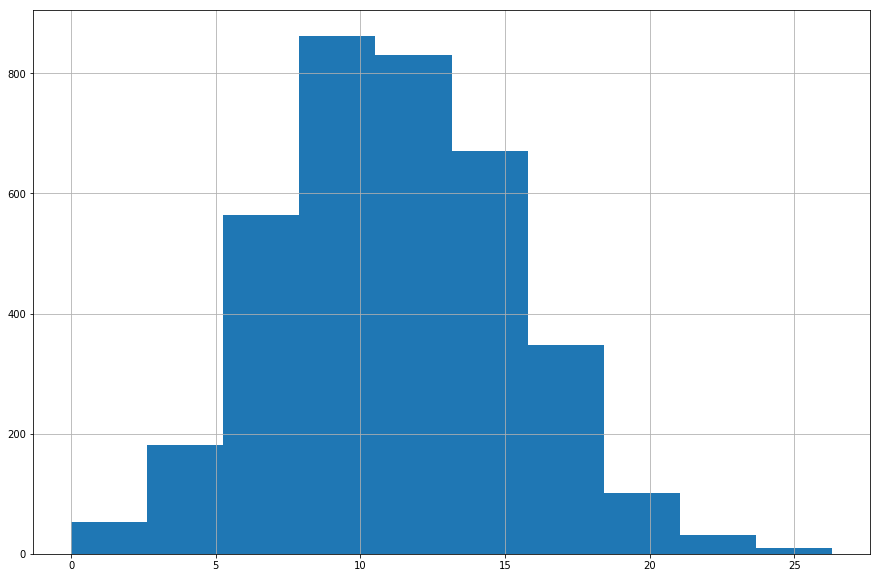

In [7]:
# Plot a histogram of the temperature dataset
temp.hist(figsize = (15,10))
plt.show()

The plot shows a distribution that looks strongly Gaussian/Normal. The plotting function automatically selects the size of the bins based on the spread of values in the data.

We can also get a better idea of the shape of the distribution of observations by using a density plot which is like the histogram, except a function is used to fit the distribution of observations with smoothing to summarize this distribution.

Let's plot a density plot of the Minimum Daily Temperatures dataset. We will achieve this by setting the `kind` parameter of the `plot()` function to `KDE`, which stands for Kernel Density Estimation

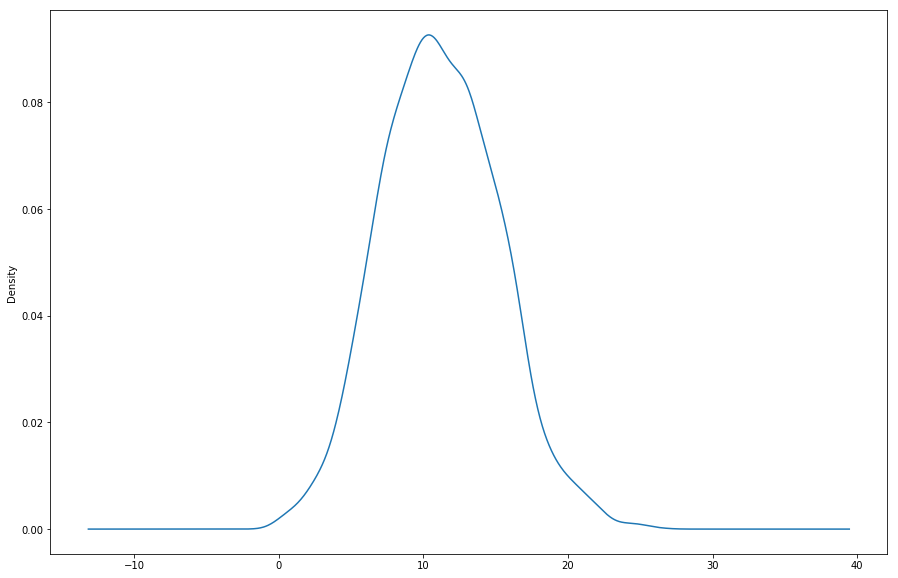

In [8]:
# Plot a density plot for temperature dataset
temp.plot(kind='kde', figsize = (15,10))
plt.show()

We can see that density plot provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian.

Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution.

### Time Series Box and Whisker Plots by Interval

Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by **time interval**.

Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

Box and whisker plots can be created and compared for each interval in a time series, such as years, months, or days.

Let's use our groups by years DataFrame to plot a box and whisker plot for each year,  side-by-side for direct comparison using `boxplot()`.

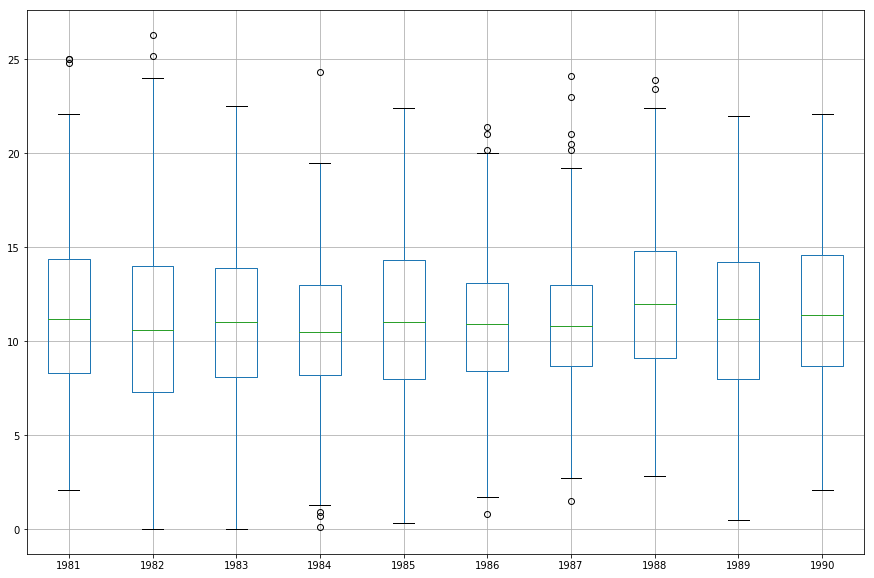

In [9]:
# Generate a box and whiskers plot for temp_annual dataframe
temp_annual.boxplot(figsize = (15,10))
plt.show()

Comparing box and whisker plots by consistent intervals is a useful tool. Within an interval, it can help to spot outliers (dots above or below the whiskers).

Across intervals, we can look for multiple year trends, seasonality, and other structural information that could be modeled. In our plot above, we dont see much difference in the mean temperature over years, however, we can spot some outliers showing extremely cold or hot days. 

We can also plot distribution across months within each year. Perform following tasks to achieve this. 
1. Extract observations for year 1990 only, the last year in the dataset.

2. Group observations by month, and add each month to a new DataFrame as a column.

3. Create 12 box and whisker plots, one for each month of 1990.

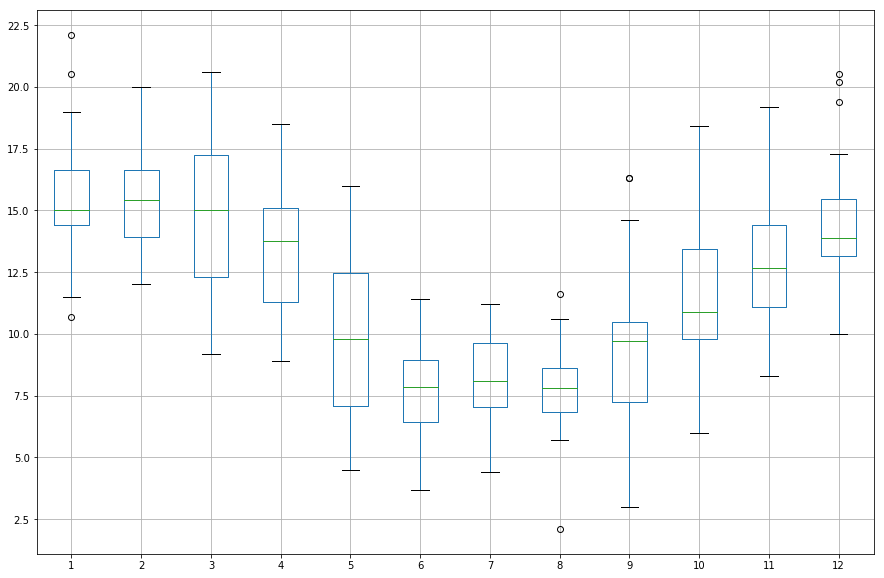

In [10]:
# Use temp Dataset to extract values for 1990
yr_1990 = temp['1990']
groups_monthly = yr_1990.groupby(pd.Grouper(freq ='M'))

# Add each month to dataFrame as a column
months_1990 = pd.concat([pd.DataFrame(x[1].values) for x in groups_monthly], axis=1)
months_df = pd.DataFrame(months_1990)

# Set the column names for each month i.e. 1,2,3, .., 12
months_df.columns = range(1,13)

# Plot the box and whiskers plot for each month 
months_df.boxplot(figsize = (15,10))
plt.show()

We see 12 box and whisker plots, showing the significant change in distribution of minimum temperatures across the months of the year from the Southern Hemisphere summer in January to the Southern Hemisphere winter in the middle of the year, and back to summer again.

### Time Series Heat Maps

A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color.This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.

In the case of the temperature dataset, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted.

We shall now create a heatmap of the Minimum Daily Temperatures data. The `matshow()` function from the matplotlib library is used as no heatmap support is provided directly in Pandas.

1. Rotate (transpose) the `temp_annual` dataframe as a new matrix the matrix so that each row represents one year and each column one day. This provides a more intuitive, left-to-right layout of the data.

2. Use `matshow()` function to draw a heatmap for transposed yearly matrix. details on matshow can be accessed [HERE](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html)

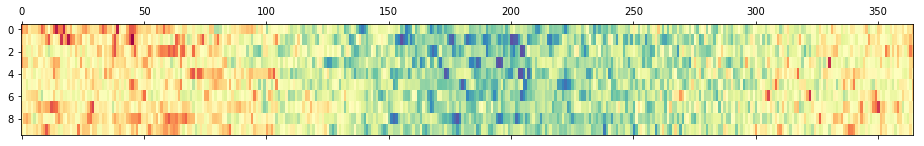

In [11]:
##### Transpose the yearly group DataFrame and draw a heatmap with matshow()

year_matrix = temp_annual.T
plt.matshow( year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

We can now see that the plot shows the cooler minimum temperatures in the middle days of the years and the warmer minimum temperatures in the start and ends of the years, and all the fading and complexity in between.

Following this intuition, let's draw another heatmap comparing the months of the year in 1990. Each column represents one month, with rows representing the days of the month from 1 to 31. (hint: use `months_df`)

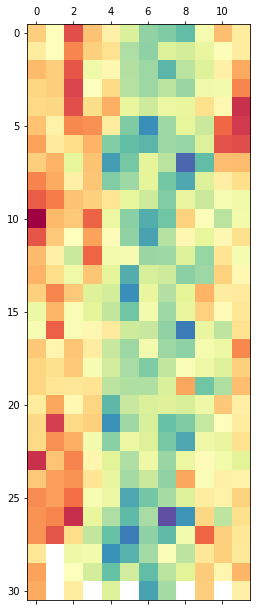

In [12]:
# draw a heatmap comparing the months of the year in 1990.
plt.matshow(months_df, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)
plt.show()

The plot shows the same macro trend seen for each year on the zoomed level of month-to-month. We can also see some white patches at the bottom of the plot. This is missing data for those months that have fewer than 31 days, with February being quite an outlier with 28 days in 1990.

We shall look into these patterns in detail in upcoming time-series labs and also study the impact of these trends on forecasting. 

### Time-Series Lag with Scatter Plots

Time-series modeling assumes a temporal relationship between an observation and the previous observation. Previous observations in a time series are called **lags**. The observation at the previous time step called **lag1**, the observation at two time steps ago **lag2**, and so on.

Scatter plots can be used to explore the relationship between each observation and lag(s) of that observation. Pandas `lag_plot()` plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis for direct comparison.

Let's import lag_plot from `pandas.tools.plotting` apply the `lag_plot()` on the temperature dataset and analyze the output. 




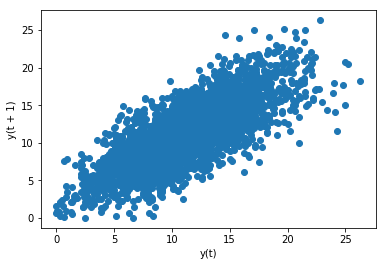

In [13]:
# Use lag_plot() to draw a lag_plot for temp dataset
from pandas.tools.plotting import lag_plot
lag_plot(temp)
plt.show()

We can perform following visual checks on a lag_plot:

* If the points cluster along a diagonal line from the bottom-left to the top-right of the plot (as in the above case), it suggests a positive correlation relationship.

* If the points cluster along a diagonal line from the top-left to the bottom-right, it suggests a negative correlation relationship.

* More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.

* A ball in the middle or a spread across the plot suggests a weak or no relationship.

Based on this, our plot above shows a relatively strong positive correlation between observations and their lag1 values.

We can also quantify the strength and type of relationship between observations and their lags. In statistics, this is called **correlation**, and when calculated against lag values in time series, it is called **autocorrelation** or self-correlation.

### Time Series Autocorrelation Plots

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

Correlation values, called **correlation coefficients**, can be calculated for each observation and different lag values. Once calculated, a plot can be created to help better understand how this relationship changes over the lag. This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the `autocorrelation_plot()` function.

Let's import `autocorrelation_plot` from `pandas.tools.plotting ` and use it to plot the temprature dataset and analyze the output

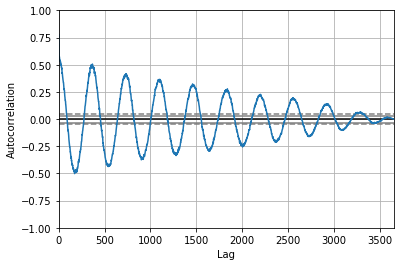

In [14]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(temp)
plt.show()

From the plot,  we see cycles of strong negative and positive correlation. The correlation plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.



## Summary 

In this lab, we discovered how to explore and better understand a time-series dataset in Python and Pandas.
We learnt how to explore the temporal relationships with line, scatter, and autocorrelation plots. We also explored the distribution of observations with histograms and density plots and change in distribution of observations with box and whisker and heat map plots.